# Culvert Design Theory

Planning software such as SWMM5, XPSWMM, InfoWorks ICM are great for modeling complicated system, with enough calibration data, we can build models that can predict the system performance with high confidence. The critical part of this process is calibrating key parameters.

However, when it comes to design problems or modeling systems without good calibration data, modelers can no long calibrate the model using observed data. For such situations, a responsible modeler will review established engineering publications and build simpler models to verify the more complicated models.

Culvert design is a great example, [FWHA HDS5 ](https://www.fhwa.dot.gov/engineering/hydraulics/pubs/12026/hif12026.pdf) is a great resource for sizing culvert with detailed background information on the theory and procedures.

With the help of the [HY-8 Culvert Hydraulic Analysis Program](https://www.fhwa.dot.gov/engineering/hydraulics/software/hy8/), a modeler can quickly get the performance curve, which can then be used as a "calibration" source when building more complicated models.

Another great source of culvert design is HECRAS, and the [reference manual](https://www.hec.usace.army.mil/software/hec-ras/documentation/HEC-RAS%205.0%20Reference%20Manual.pdf) has good information on how RAS implements and improves the FHWA method.




# Inlet Control vs Outlet Control

The theory is quite complicated, and the good news is that I don't need to know the details for most design problems because I can rely on HY8 and HECRAS for quick calculations.

It does help to have some basic understand of inlet and outlet control.

## Inlet control

Inlet control is when the inlet is limiting the flow that can pass through the culvert, so downstream condition doesn't matter. In this case, empirical equations were developed to calculate the headwater depth. As shown blow, typically the inlet works as an weir or orifice and supercritical flow develops inside the culvert.



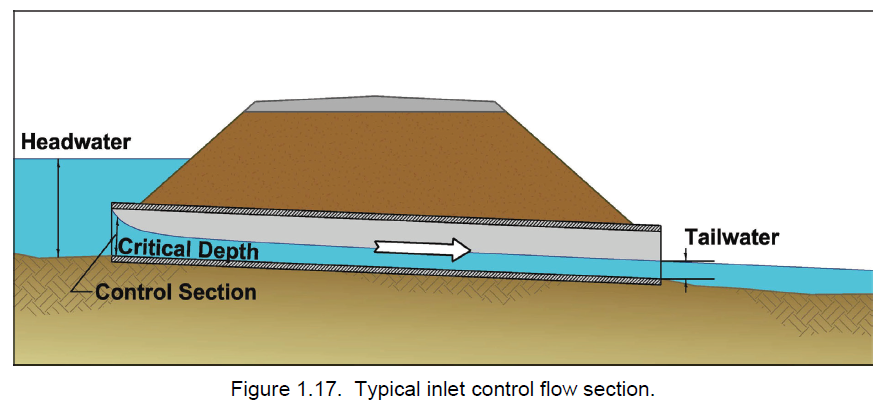

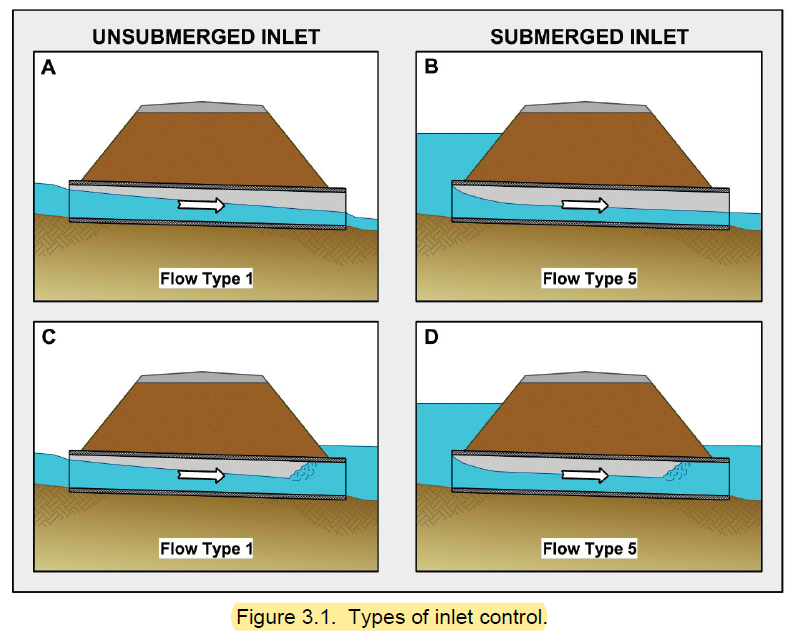

## Outlet Control

Outlet control is more complicated, both upstream and downstream conditions matters. And it is usually calculated using engery equations. And for SWMM5, it relies on the SWMM unsteady state engine to figure out the headwater depth.

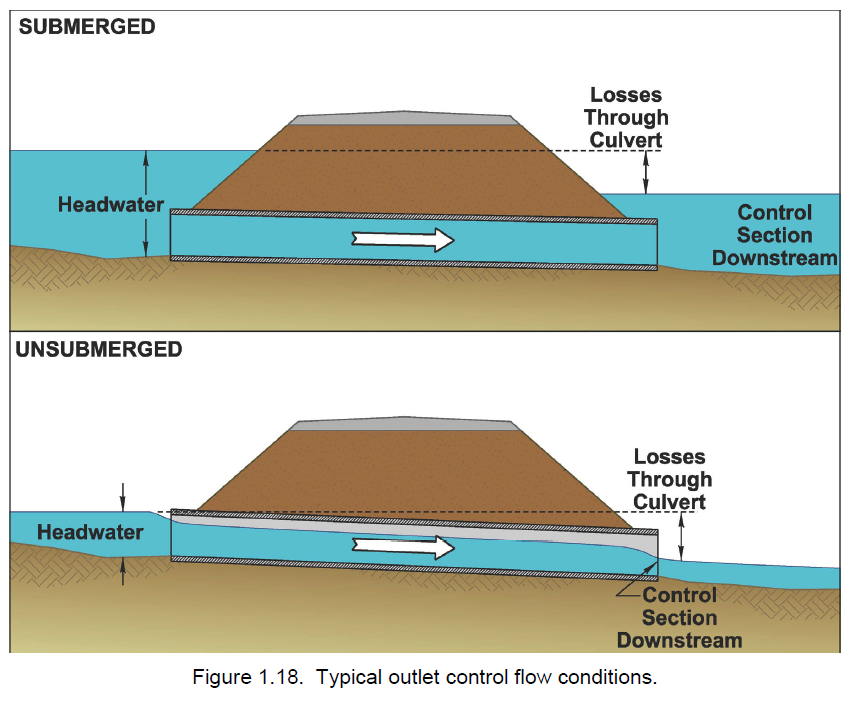

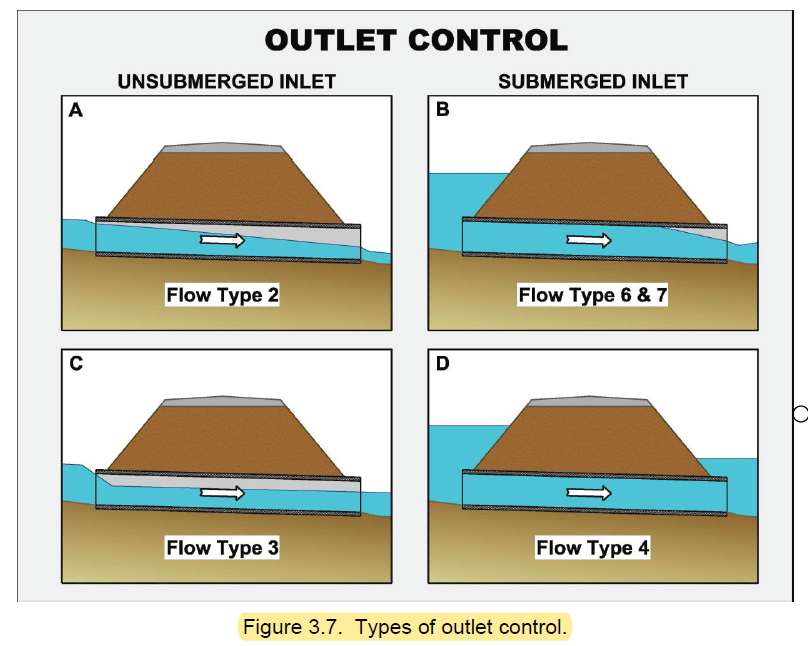

# Design Problem


HDS5 has the following example, 
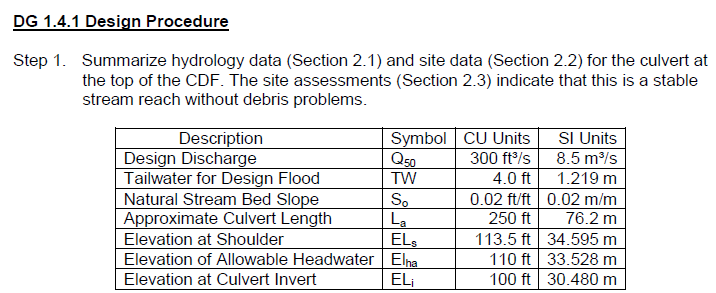


The results,

**54" RCP El hi=108.0ft, V0=15.3ft/s**


Let's go through that using the nomograph, HY8 and SWMM5

## HY-8

Example: 54" RCP El hi=108.0ft, V0=15.3ft/s

HY-8: El=108.61ft, v0=14.88 ft/s, within 1% difference.

The model is saved to : **./data/hy8/hds5_example.hy8**


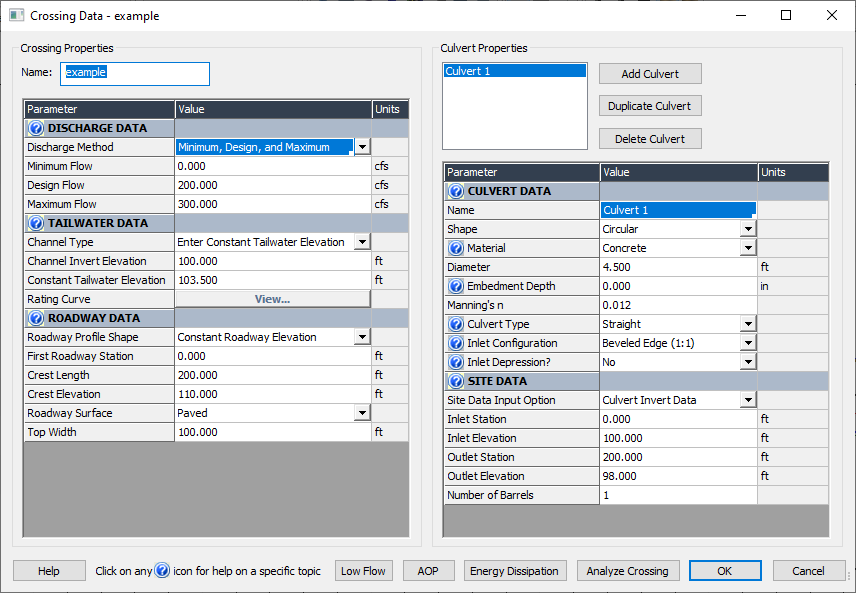

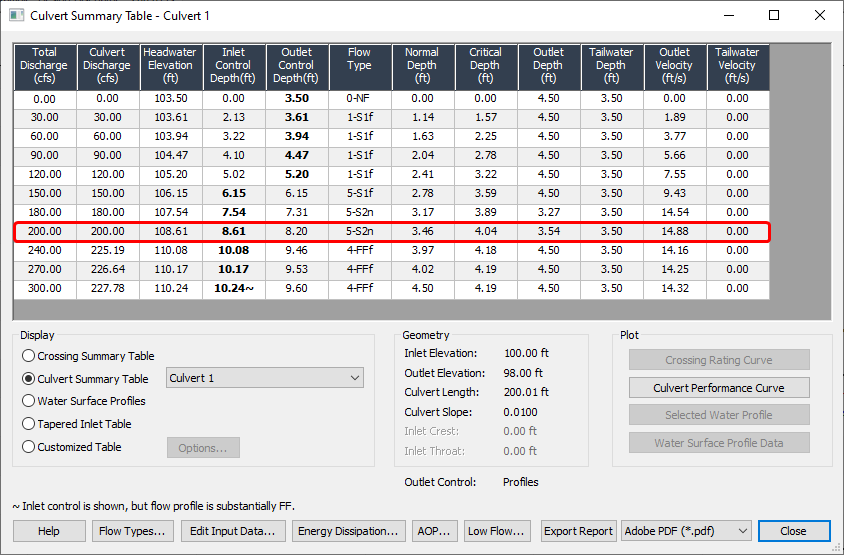

## Nomogrpah
For concrete pipes we'll use Nomographs chart 1B for inlet control, and chart 5B for outlet control.

Inlet control:

El = 4.5\*2.5=8.8ft


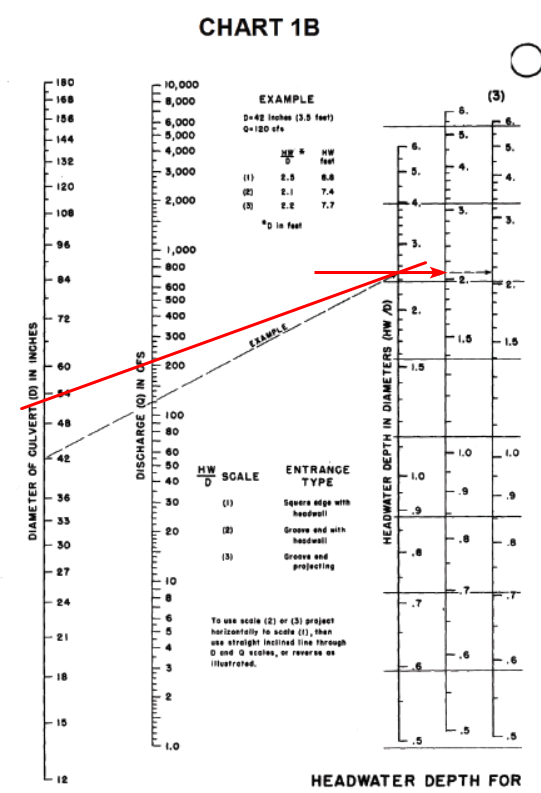

For outlet control, the reading is the difference between headwater and tailwater, so I got 5ft from the nomograph, and the tailwater is about 3.5ft, which makes the headwater 5+3.5=8.5ft, very close to the 8.2 I got from HY8.


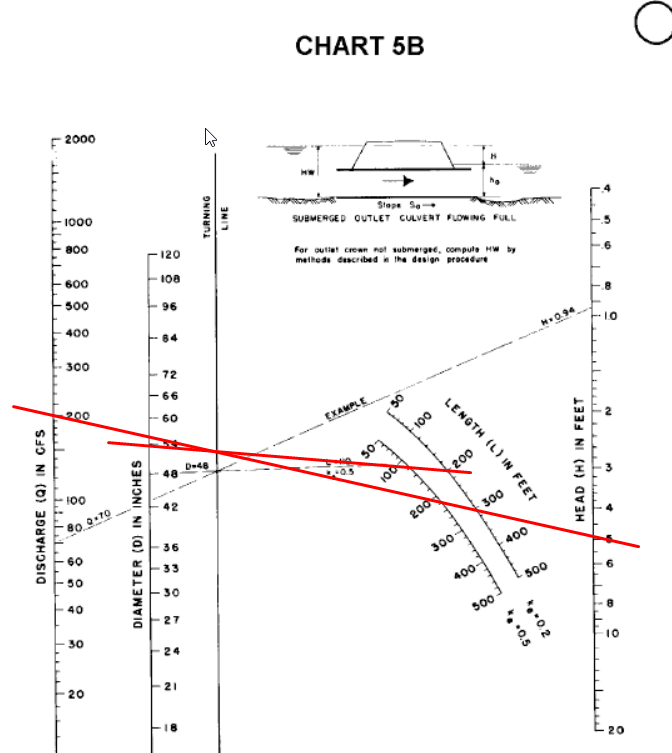

# Performance Curve

HY8 gives the performance curve for the culvert. The table is saved to **./data/hy8/dg131_performance_curve.csv**

- For  0-30 cfs it is outlet control
- for >30cfs it is inlet control
- The difference between inlet/outlet control is around 1.6ft > 100 cfs


When using other models, I am expecting a deviation around 10% of HW (measured from face invert) should be considered a good match(HSD5 states 10% error of the culvert calculations). 

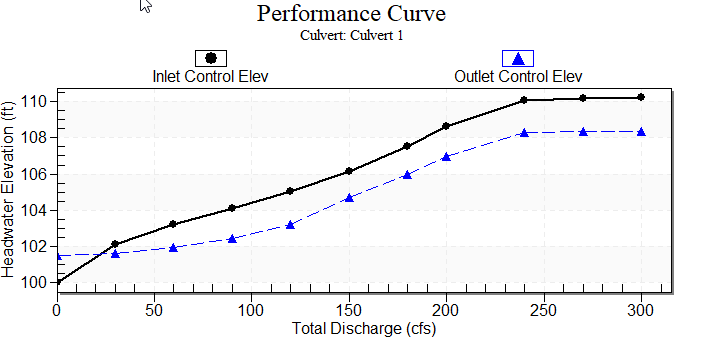

Profile in HY8, it shows the profile decreases to the critical depth at the entrance.

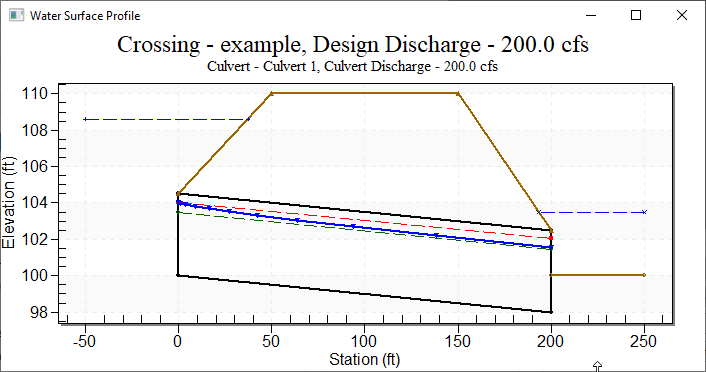

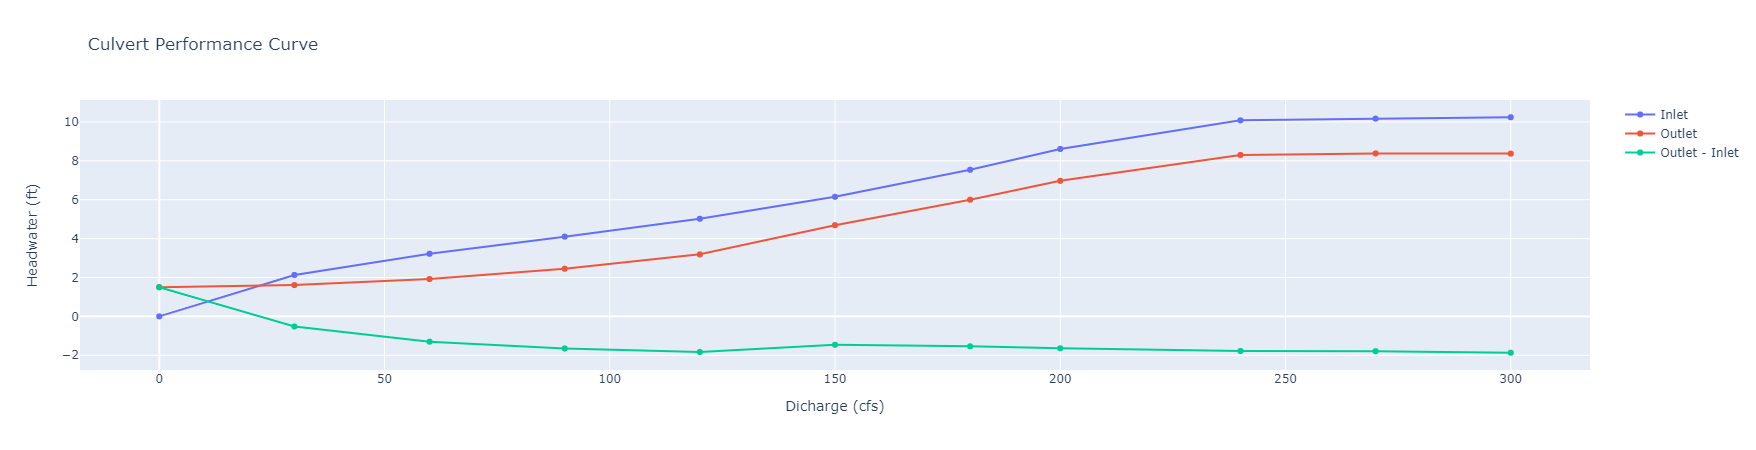

In [20]:
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

ws = r'C:\Users\Mel.Meng\Documents\GitHub\SewerAnalysis\references\culvert\data'
f = os.path.join(ws, "hy8/dg131_performance_curve.csv")
df = pd.read_csv(f)
fig = go.Figure()
fig.add_trace(go.Scatter(x=df["q"], y=df["inlet"], name='Inlet'))
fig.add_trace(go.Scatter(x=df["q"], y=df["outlet"], name='Outlet'))
fig.add_trace(go.Scatter(x=df["q"], y=df["outlet"]-df["inlet"], name='Outlet - Inlet'))
fig.update_layout(title='Culvert Performance Curve', xaxis_title="Dicharge (cfs)", yaxis_title="Headwater (ft)",)
fig.show()

# What's next?

In the following notebooks, I'll compare/calibrate culverts models using SWMM5, HECRAS, XPSWMM and ICM with HY8 results.